# Assignment 4 - Clustering

<b>Sai Krishna Bezawada 1002115182</b><br>
<b>Abhishek Saraf 1002125030</b><br>
<b>Darsh Patel Alpeshbhai 1002052912</b>

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [100]:
import pandas as pd

cluster_data = pd.read_csv("Country-data.csv")
cluster_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [101]:
cluster_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [102]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [103]:
cluster_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Comment your action here

### Part 1B: 10 points

Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
# Drop unnecessary columns
data = cluster_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

# Scale the data
scaler = StandardScaler()
processed_data = scaler.fit_transform(data)

In [106]:
processed_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Explain your actions
dropped Country Column and selected every other feature to 'data' variable and scaled the data using standard scalar that can be useful for ML algorithms that are sensitive to the scale of the features

### Part 1C: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

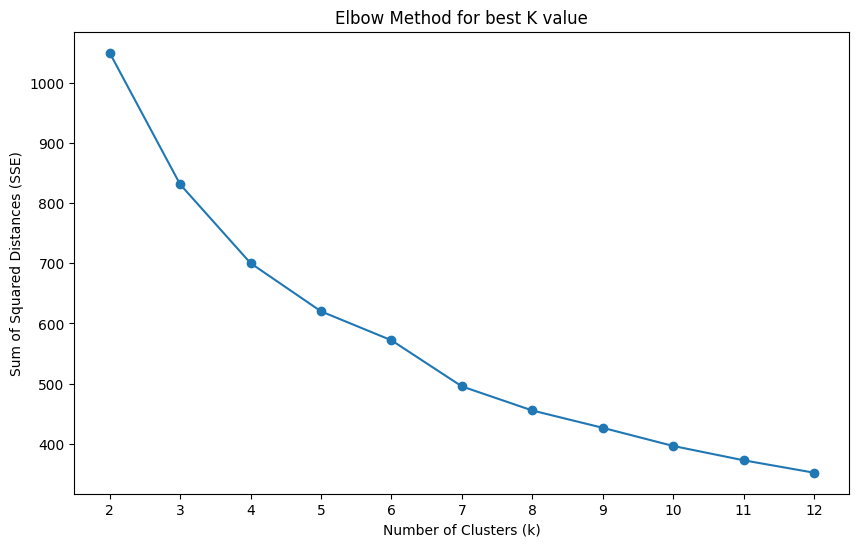

In [108]:
# Perform K-means clustering for k from 2 to 12
sse = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    sse.append(kmeans.inertia_)

# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), sse, marker='o')
plt.title('Elbow Method for best K value')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(range(2, 13))
plt.show()



The sum of squared distance after the K value 4 is less. So we are considering K=4 is the best value

### Part 1D: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

In [109]:
from sklearn.metrics import silhouette_score

In [110]:
silhouette_scores = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(processed_data)
    silhouette_scores.append(silhouette_score(processed_data, kmeans.labels_))

# Display Silhouette scores
for k, score in zip(range(2, 13), silhouette_scores):
    print(f"K = {k}, Silhouette Score = {score:.4f}")


C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

K = 2, Silhouette Score = 0.2874
K = 3, Silhouette Score = 0.2833
K = 4, Silhouette Score = 0.3014
K = 5, Silhouette Score = 0.2993
K = 6, Silhouette Score = 0.2351
K = 7, Silhouette Score = 0.2491
K = 8, Silhouette Score = 0.2414
K = 9, Silhouette Score = 0.2034
K = 10, Silhouette Score = 0.2193
K = 11, Silhouette Score = 0.1980
K = 12, Silhouette Score = 0.2060


C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


As we can see from the above data, Silhouette Score = 0.3014 is highest and close to +1 at K=4

### Part 1E: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [120]:
best_k = 4

# Perform K-means clustering with the best K value
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(processed_data)

# Add cluster labels as a new column in the original data
data['cluster_label'] = cluster_labels
data['country']=cluster_data['country']

# Print the data with cluster labels
data

C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  cluster_label              country  
0         5.82    553              1          Afghanistan  
1         1.65   4090              0              Albania  
2         2.89   4460              0              Algeria  
3         6.16   3530              1               Angola  
4         2.13  12200              0  Antigua and Barbuda  
..         ...    ...            ...                  ...  
162       3.50   2970              0              Vanuatu  
163       2.47  13500              0            Venezuela  
164       1.95   1310              0              Vietnam  
165       4.67   1310              1                Yemen  
166       5.40   1460              1               Zambia  

[167 rows x 11 columns]

added cluter_label after performing K-means to the data and a country label from the original data

### Part 1F: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [121]:
# Calculate average values for each column within each cluster
cluster_avg = data.groupby('cluster_label').mean()

# Print the average values for each cluster
cluster_avg

C:\Users\saikr\AppData\Local\Temp\ipykernel_20772\2337240984.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_avg = data.groupby('cluster_label').mean()


child_mort     exports    health     imports        income  \
cluster_label                                                               
0               21.389655   41.290678  6.235862   48.038689  12968.620690   
1               92.961702   29.151277  6.388511   42.323404   3942.404255   
2                4.953333   45.826667  9.168667   39.736667  45250.000000   
3                4.133333  176.000000  6.793333  156.666667  64033.333333   

               inflation  life_expec  total_fer          gdpp  
cluster_label                                                  
0               7.413460   72.935632   2.286552   6919.103448  
1              12.019681   59.187234   5.008085   1922.382979  
2               2.742200   80.376667   1.795333  43333.333333  
3               2.468000   81.433333   1.380000  57566.666667

Country with the highest average GDPP has the most life expectancy and the highest average income and had the most imports, exports and lowest Child Mortality Rate. Vice versa. Countries with better gdpp has the better living in terms of live expectancy and child mortality rate.

### Part 1G: 5 points

Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

In [122]:
# Display top 5 countries within each cluster
for cluster in range(best_k):
    cluster_countries = data[data['cluster_label'] == cluster]
    sorted_cluster = cluster_countries.sort_values(by='gdpp', ascending=False)
    top_countries = sorted_cluster.head(5)
    
    print(f"Top 5 countries in Cluster {cluster}:\n")
    print(top_countries[['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])


Top 5 countries in Cluster 0:

            country  child_mort  exports  health  imports  income  inflation  \
10          Bahamas        13.8     35.0    7.89     43.7   22900     -0.393   
11          Bahrain         8.6     69.5    4.97     50.9   41100      7.440   
43   Czech Republic         3.4     66.0    7.88     62.9   28300     -1.430   
115            Oman        11.7     65.7    2.77     41.2   45300     15.600   
128    Saudi Arabia        15.7     49.6    4.29     33.0   45400     17.200   

     life_expec  total_fer   gdpp  
10         73.8       1.86  28000  
11         76.0       2.16  20700  
43         77.5       1.51  19800  
115        76.1       2.90  19300  
128        75.1       2.96  19300  
Top 5 countries in Cluster 1:

               country  child_mort  exports  health  imports  income  \
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
55               Gabon        63.7     57.7    3.50     18.9   15400   
137       South Africa   

### Part 1F: 5 points

Plot health vs life-expec and shade each point belonging to it's respective cluster.

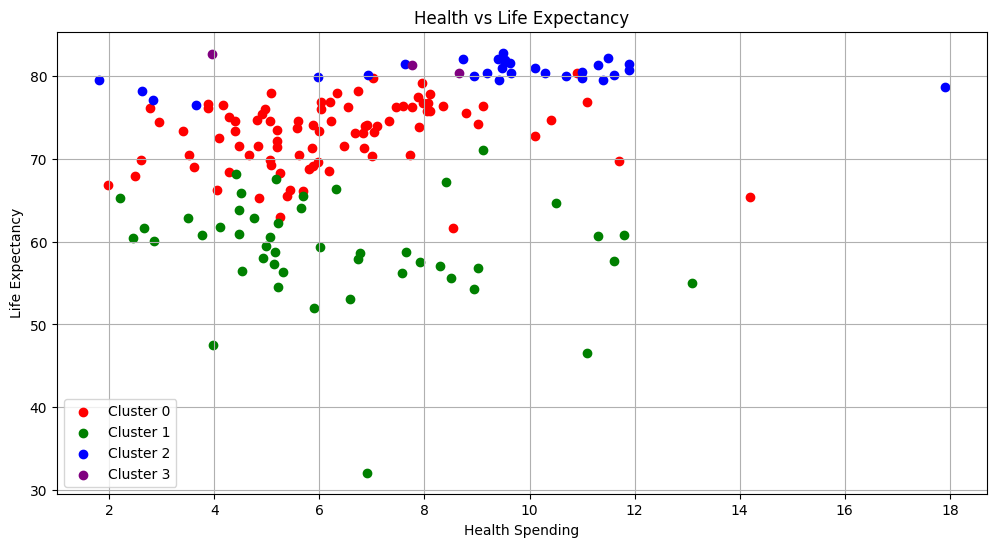

In [123]:
import matplotlib.pyplot as plt

# Create a scatter plot with shaded clusters
plt.figure(figsize=(12, 6))

for cluster in range(best_k):
    cluster_df = data[data['cluster_label'] == cluster]
    plt.scatter(cluster_df['health'], cluster_df['life_expec'], color=['red', 'green', 'blue', 'purple'][cluster], label=f'Cluster {cluster}')

plt.xlabel('Health Spending')
plt.ylabel('Life Expectancy')
plt.title('Health vs Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()


## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [92]:
data = pd.read_csv('co-ordinates.csv')
data.head()

X         Y
0 -10.288860 -3.480595
1 -11.025979 -4.267757
2  -9.242627 -3.115357
3   9.572838 -0.395079
4  -6.625216 -8.221243

### Part 2A: 5 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

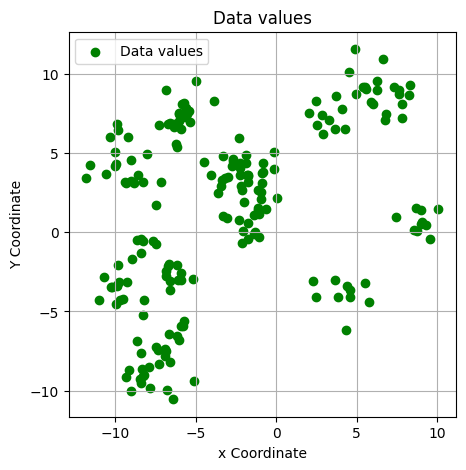

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Prepare the data for clustering by extracting the columns from dataset and combining them into a single array
x_col = data["X"].values
y_col = data["Y"].values
arr_coordinates = np.column_stack((x_col, y_col))

# scatter plot the values of the data and observe the number of clusters
plt.figure(figsize=(5,5))
plt.scatter(x_col, y_col, c='green' , label='Data values')
plt.xlabel('x Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Data values')
plt.legend()
plt.grid(True)
plt.show()

as it can be observed,there are about 8 distinct data point clusters in the graph.

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

In [95]:
from sklearn.cluster import AgglomerativeClustering

C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\saikr\AppData\L

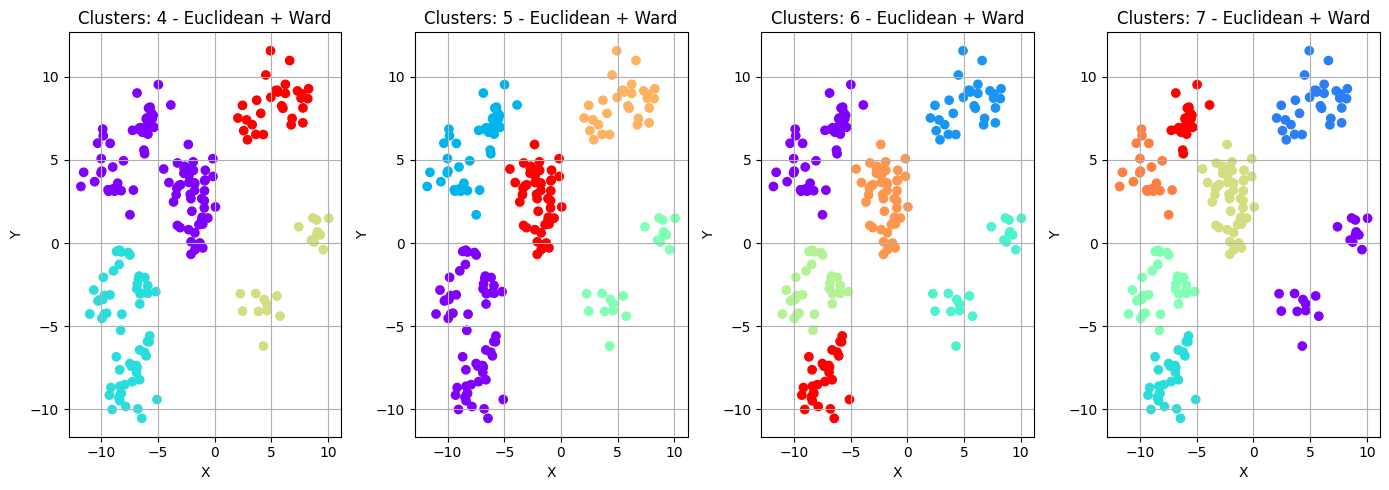

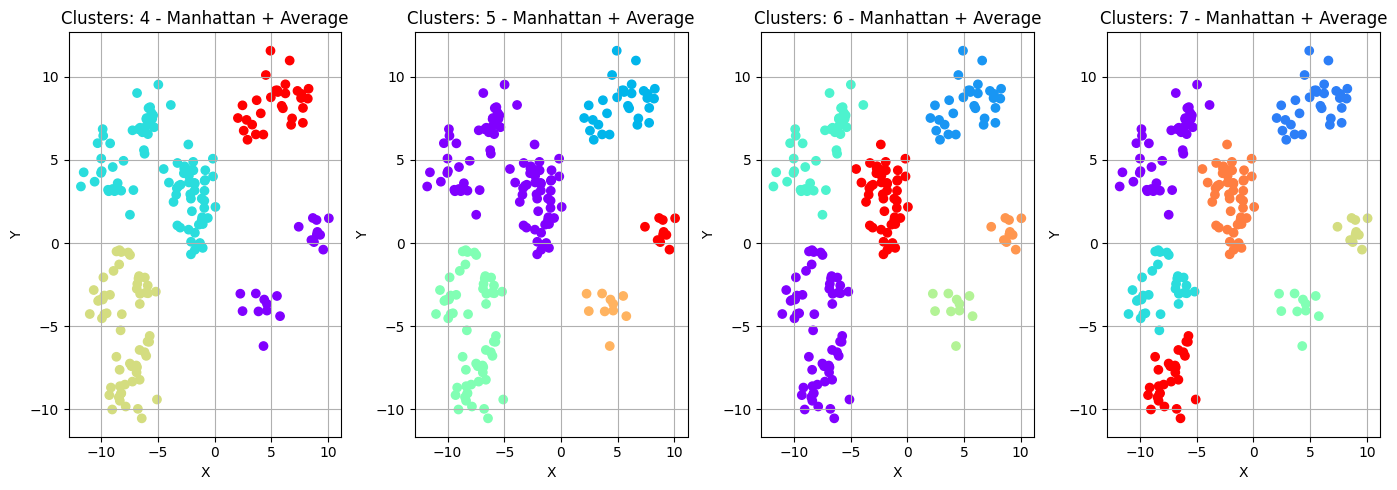

In [96]:
# Perform hierarchical clustering with different affinity and linkage combinations
cluster_range = [4,5,6,7]
affinities = ['euclidean', 'manhattan']
linkages = ['ward', 'average']
results = {}

for affinity in affinities:
    for linkage_method in linkages:
        # Exclude invalid combinations
        if (affinity == 'manhattan' and linkage_method == 'ward') or (affinity == 'euclidean' and linkage_method == 'average'):
            continue
        
        for n_clusters in cluster_range:
            model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage_method)
            clusters = model.fit_predict(arr_coordinates)
            results[(affinity, linkage_method, n_clusters)] = clusters

# Plotting the results
for affinity in affinities:
    for linkage_method in linkages:
        if (affinity == 'manhattan' and linkage_method == 'ward') or (affinity == 'euclidean' and linkage_method == 'average'):
            continue
        
        plt.figure(figsize=(14, 5))
        plt.title(f'Hierarchical Clustering\nAffinity: {affinity.capitalize()}, Linkage: {linkage_method.capitalize()}')
        
        for n_clusters in cluster_range:
            plt.subplot(1, len(cluster_range), n_clusters - 3)
            clusters = results[(affinity, linkage_method, n_clusters)]
            plt.scatter(data['X'], data['Y'], c=clusters, cmap='rainbow')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title(f'Clusters: {n_clusters} - {affinity.capitalize()} + {linkage_method.capitalize()}')
            plt.grid(True)

        plt.tight_layout()
        plt.show()
        
# Referances
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# https://www.datasklr.com/segmentation-clustering/hierarchical-clustering


From the above plotted graphs, my observation is that clusters with K=7 along with manhattan and average link 
is more optimal is comaparison to other used techniques.


### Part 2C: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage

C:\Users\saikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


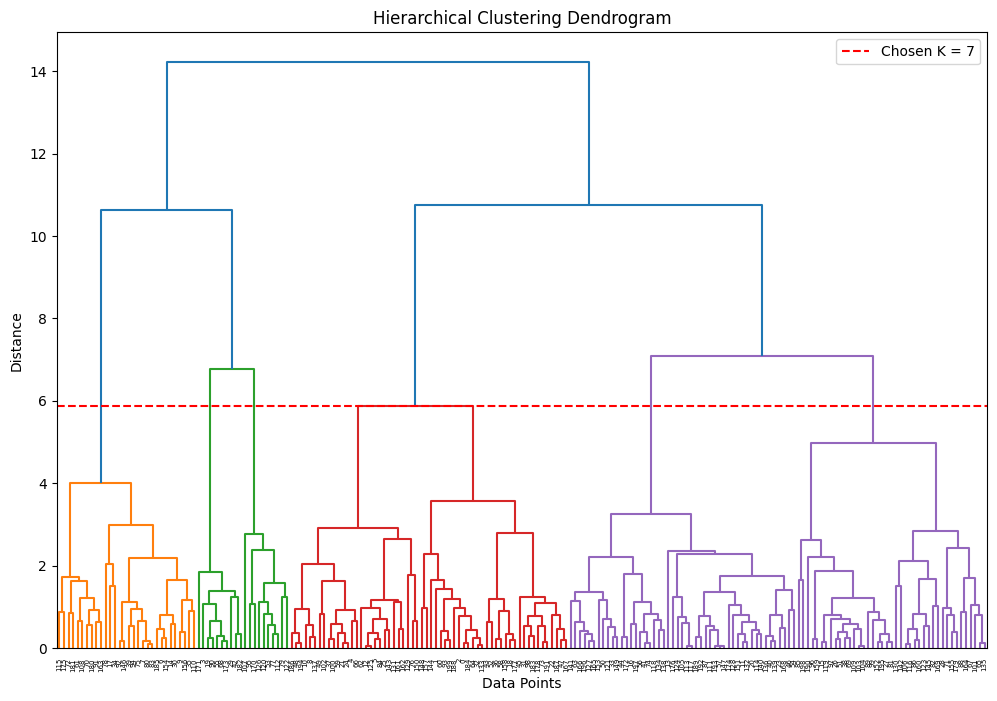

In [99]:
chosen_metric = 'manhattan'
chosen_linkage = 'average'
chosen_clusters = 7

model = AgglomerativeClustering(n_clusters=chosen_clusters, affinity=chosen_metric, linkage=chosen_linkage)
clusters = model.fit_predict(arr_coordinates)

linkage_matrix = linkage(arr_coordinates, method=chosen_linkage)
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.axhline(y=linkage_matrix[-chosen_clusters+1, 2], color='r', linestyle='--', label=f'Chosen K = {chosen_clusters}')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend()
plt.show()

#Reference: # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

The height at which branches are joined represents the distance between the clusters being merged. 
The red dashed line indicates where you've chosen to cut the dendrogram to obtain the desired number of clusters.

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.